In [1]:
import sys
sys.path.append('..')

In [2]:
from nbhd.data import Base

In [3]:
db = Base()

Initializing database connection...
Database connected!


In [4]:
from xy import xy

In [5]:
import geopandas as gpd

In [6]:
from shapely.geometry import Point

In [7]:
from nbhd.geometry import pointbox

In [8]:
from nbhd.geography import get_communities

In [9]:
geom = pointbox(Point(xy),1000)

In [10]:
pixels = db.query(db.spatial_sql('pixels','intersects',geom.buffer(5000)), spatial=True)

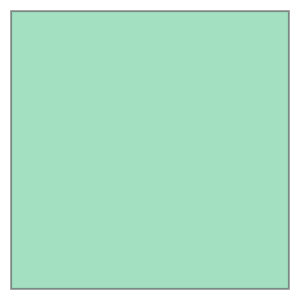

In [11]:
pixels.geometry[0]

In [12]:
dfs = list()
sgs = dict()
for i, p in enumerate(pixels.geometry):
    df, graphs = get_communities(db, p, min_community_size=10)
    dfs.append(df)
    sgs[i] = graphs

Starting to find neighbourhoods in POLYGON ((332000 386000, 332000 388000, 334000 388000, 334000 386000, 332000 386000))
Collected 9094 properties...
... of which 8328 are in buildings
Getting streets...
Snapping nodes...
Finding connected graphs...
Labelling communities.
Starting to find neighbourhoods in POLYGON ((332000 388000, 332000 390000, 334000 390000, 334000 388000, 332000 388000))
Collected 3760 properties...
... of which 3282 are in buildings
Getting streets...
Snapping nodes...
Finding connected graphs...
Labelling communities.
Starting to find neighbourhoods in POLYGON ((332000 390000, 332000 392000, 334000 392000, 334000 390000, 332000 390000))
Collected 5788 properties...
... of which 4684 are in buildings
Getting streets...
Snapping nodes...
Finding connected graphs...
Labelling communities.
Starting to find neighbourhoods in POLYGON ((332000 392000, 332000 394000, 334000 394000, 334000 392000, 332000 392000))
Collected 774 properties...
... of which 455 are in building

In [13]:
dfs[2].community.unique()

array(['01', None, '02', '03', '04', '05'], dtype=object)

<AxesSubplot:>

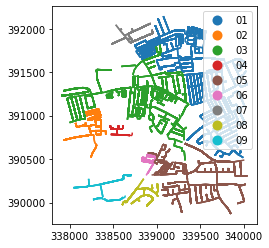

In [50]:
df = dfs[21]
gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkb(df.roads_geometry)).plot('community', legend=True)

In [15]:
len(dfs)

43

In [16]:
lengths = dict()

In [24]:
for i, d in enumerate(dfs):
    lengths[i] = len(d.community.unique())
    

In [25]:
pd.DataFrame(lengths, index=['communities']).T

In [51]:
pass

In [19]:
import pandas as pd

In [48]:
sgs[21]

In [52]:
g = sgs[21][2]

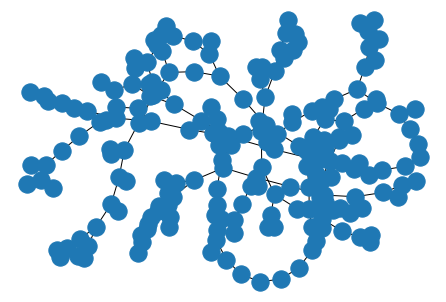

In [56]:
nx.draw(g)

In [55]:
import networkx as nx

In [65]:
df = pd.DataFrame(nx.betweenness_centrality(g),index=['bc']).T

In [67]:
df.sort_values('bc')

,bc
idFA9DF51B-7167-41C8-95F6-FBD8B842072B,0.000000
id74A87B08-2A92-4EC9-8DD4-794821B7C857,0.000000
id35151025-FB63-440D-84D4-50ACC3628028,0.000000
id13D417AF-FE76-47D0-8C19-D63FB13E970D,0.000000
id836D0BA6-3A72-4B5E-AEE8-4FECBB99E10A,0.000000
...,...
id48C6EF28-9B54-4EBC-A418-D409618AC67F,0.434774
id0EE91741-5C02-46F5-82AE-0A8ADBFEB743,0.440477
id86272BD2-9347-40CC-A677-10A3A3714DDD,0.453291
idC042F52E-1D72-4180-AEAD-12047187DD15,0.466633


In [69]:
dfs[21].columns

Index(['properties_id', 'properties_geometry', 'roads_id', 'startNode',
       'endNode', 'roads_geometry', 'dist', 'geometry', 'length',
       'street_counts', 'street_length_per_uprn', 'residential_street',
       'residential', 'short_street', 'res_or_short', 'community'],
      dtype='object')

In [70]:
xdf = dfs[21].loc[dfs[21].community=='03']

In [73]:
len(xdf)

3630

In [76]:
xdf.columns

Index(['properties_id', 'properties_geometry', 'roads_id', 'startNode',
       'endNode', 'roads_geometry', 'dist', 'geometry', 'length',
       'street_counts', 'street_length_per_uprn', 'residential_street',
       'residential', 'short_street', 'res_or_short', 'community'],
      dtype='object')

In [78]:
xdf.community.unique()

array(['03'], dtype=object)

In [80]:
xdf.street_counts.describe()

count    3630.000000
mean       46.851791
std        37.651812
min         1.000000
25%        17.000000
50%        36.000000
75%        76.000000
max       150.000000
Name: street_counts, dtype: float64

In [82]:
xdf.short_street.value_counts()

False    2871
True      759
Name: short_street, dtype: int64

In [84]:
xdf.residential.value_counts()

True    3630
Name: residential, dtype: int64

In [85]:
xdf.length.describe()

count    3630.000000
mean      142.609405
std        89.363378
min         7.071068
25%        62.664121
50%       124.253451
75%       213.974298
max       444.689103
dtype: float64

In [86]:
xdf.street_length_per_uprn.describe()

count    3630.000000
mean        4.639479
std         4.585283
min         0.631940
25%         2.427482
50%         3.660149
75%         5.122940
max        49.497475
Name: street_length_per_uprn, dtype: float64

In [91]:
pixels.iloc[21].geometry.centroid.xy

(array('d', [339000.0]), array('d', [391000.0]))